<center>

---



## Aprendizaje No Supervisado
    Práctico Grupo 3
## FIFA Mujeres 2023 
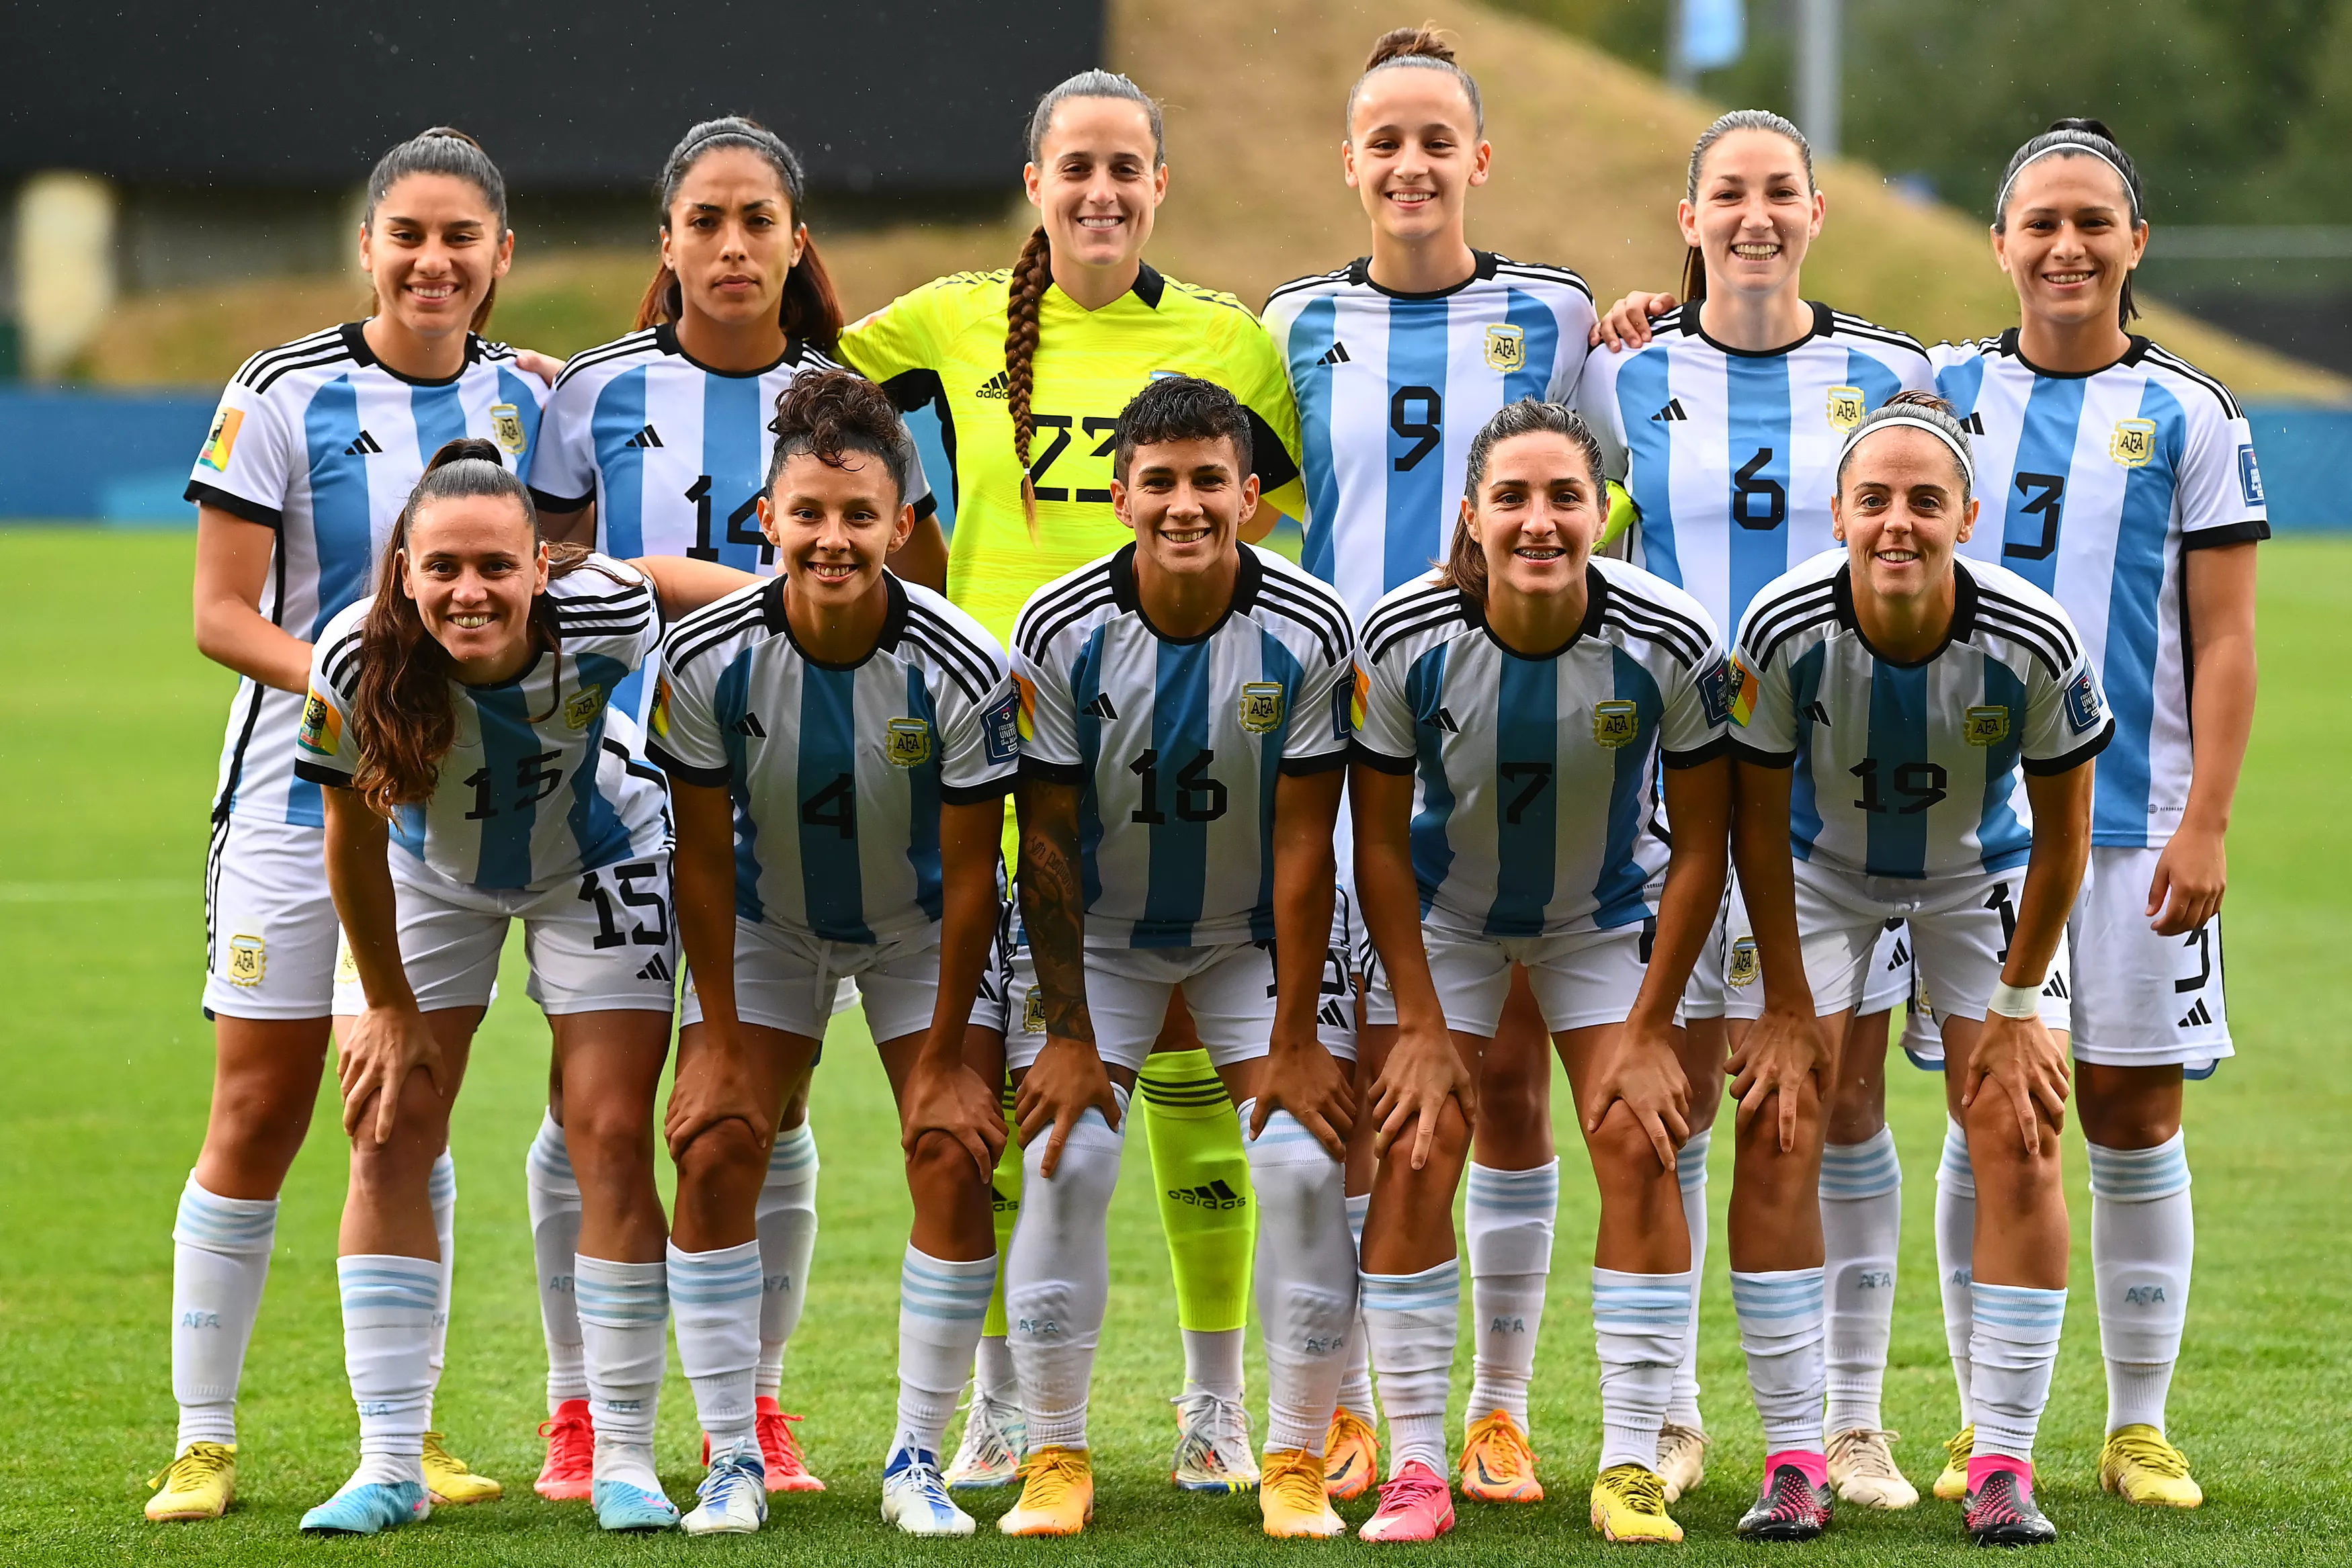


## 1.-Inicialización-del-entorno

**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## 2.-Exploración-de-la-base

**Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) (https://www.kaggle.com/karangadiya/fifa19) como 'female_players.csv'.**

In [3]:
url='https://github.com/TMTrincheri/ANS_G3/blob/main/female_players.csv'

In [4]:
df = pd.read_csv('female_players.csv')
df.head(5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,...,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,...,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,...,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,...,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89,89,89,87,87+3,87+3,87+3,85+3,78+3,78+3,78+3,85+3,63+3,61+3,61+3,61+3,63+3,60+3,56+3,56+3,56+3,60+3,20+3,https://cdn.sofifa.net/players/227/310/23_120.png
4,227246,/player/227246/lucy-bronze/230009,23,9,2023-01-13,L. Bronze,Lucia Roberta Tough Bronze,RB,89,89,NaN,NaN,30,1991-10-28,171,6

In [11]:
df.tail(10)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
181351,227459,/player/227459/liliana-mercado/160001,16,1,2015-08-28,L. Mercado,Liliana Mercado Fuentes,CDM,66,70,NaN,NaN,26,1988-10-22,163,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,Mexico,113010.0,SUB,20.0,Right,2,2,1,Low/Medium,Normal (170-),No,NaN,NaN,NaN,56.0,41.0,56.0,62.0,67.0,68.0,55,33,45,...,67,77,52,77,73,64,44,70,72,48,55,52,NaN,68,71,68,9,13,9,13,6,NaN,51,51,51,55,54,54,54,55,57,57,57,57,61,61,61,57,65,66,66,66,65,65,66,66,66,65,16,https://cdn.sofifa.net/players/227/459/16_120.png
181352,227925,/player/227925/mackenzie-arnold/160001,16,1,2015-08-28,M. Arnold,Mackenzie Elizabeth Arnold,GK,66,73,NaN,NaN,21,1994-02-25,179,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195,Australia,112998.0,SUB,21.0,Right,2,1,1,Medium/Medium,Stocky (170-185),No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,19,18,...,62,63,23,56,57,57,13,15,18,16,15,25,NaN,16,10,14,67,61,66,70,67,45.0,27,27,27,25,25,25,25,25,24,24,24,27,24,24,24,27,27,24,24,24,27,26,24,24,24,26,66,https://cdn.sofifa.net/players/227/925/16_120.png
181353,228841,/player/228841/lina-zhao/160001,16,1,2015-08-28,Zhao Lina,赵丽娜,GK,66,75,NaN,NaN,23,1991-09-18,182,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155,China PR,113001.0,SUB,22.0,Right,2,1,1,Medium/Medium,Lean (170-185),No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,15,11,...,69,67,17,58,55,45,17,20,24,18,19,21,NaN,17,16,18,62,66,52,70,67,43.0,25,25,25,26,26,26,26,26,26,26,26,28,28,28,28,28,29,28,28,28,29,29,25,25,25,29,66,https://cdn.sofifa.net/players/228/841/16_120.png
181354,228090,/player/228090/anjuli-ladron/160001,16,1,2015-08-28,A. Ladrón,Anjuli Mariana Ladron de Guevara Guerena,GK,65,67,NaN,NaN,28,1986-10-07,173,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,Mexico,113010.0,SUB,23.0,Right,3,1,1,Medium/Medium,Normal (170-185),No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,10,14,...,67,36,24,50,27,39,15,23,17,10,34,22,NaN,12,10,16,66,62,54,67,67,25.0,21,21,21,22,23,23,23,22,25,25,25,23,26,26,26,23,22,24,24,24,22,22,22,22,22,22,65,https://cdn.sofifa.net/players/228/090/16_120.png
181355,228721,/player/228721/renae-cuellar/160001,16,1,2015-08-28,R. Cuéllar,Renae Nicole Cuéllar,ST,65,69,NaN,NaN,25,1990-06-24,164,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,Mexico,113010.0,SUB,19.0,Right,3,3,1,Medium/Medium,Normal (170-),No,NaN,NaN,NaN,65.0,66.0,47.0,62.0,24.0,60.0,35,65,66,...,69,58,72,74,59,67,63,41,25,65,59,71,NaN,16,21,13,14,13,14,6,5,NaN,65,65,65,60,63,63,63,60,60,60,60,58,54,54,54,58,42,41,41,41,42,40,39,39,39,40,16,https://cdn.sofifa.net/players/228/721/16_120.png
181356,227385,/player/227385/nkem-ezurike/160001,16,1,2015-08-28,N. Ezurike,Nkem Ezurike,ST,64,71,NaN,NaN,23,1992-03-19,180,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,Canada,113000.0,SUB,22.0,Right,3,2,1,Medium/Medium,Normal (170-185),No,NaN,NaN,NaN,67.0,60.0,51.0,63.0,20.0,67.0

In [12]:
print(df.columns)
print(len(df.columns), 'variables')

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object', length=110)
110 variables


In [13]:
print(df.describe())

           player_id   fifa_version    fifa_update        overall  \
count  181361.000000  181361.000000  181361.000000  181361.000000   
mean   234662.993907      19.223538      36.727703      76.269909   
std     10659.745380       2.060414      23.555409       5.709719   
min    226177.000000      16.000000       1.000000      49.000000   
25%    227117.000000      17.000000      16.000000      72.000000   
50%    227586.000000      19.000000      35.000000      76.000000   
75%    241226.000000      21.000000      54.000000      80.000000   
max    273050.000000      23.000000      99.000000      93.000000   

           potential     value_eur     wage_eur            age      height_cm  \
count  181361.000000  4.831000e+03  4831.000000  181361.000000  181361.000000   
mean       79.672967  1.668368e+07   818.505485      26.014099     168.756464   
std         5.422202  2.425583e+07   468.435485       3.907456       6.249204   
min        49.000000  3.250000e+05   500.000000      1

tipos de variables:

In [ ]:
#completar

In [21]:
print(df.attacking_crossing)

0         70
1         51
2         71
3         71
4         87
          ..
181356    49
181357    55
181358    43
181359    62
181360    35
Name: attacking_crossing, Length: 181361, dtype: int64


90
[70 51 71 87 90 84 64 78 15 74 63 94 86 73 69 50 58 75 89 81 79 61 45 33
 93 17 26 83 13 11 77 62 18 72 59 57 66 67 60 12  9 80  8 38 68 28 82 53
 65 88 25 23 85 76 41 42 14 56 49 34 10 32 48 52 21 44 47 46 16 39 55 29
 22 40 35 43 54 31 19 36 27 30  6 37 92 91  5 24 20]


<AxesSubplot:>

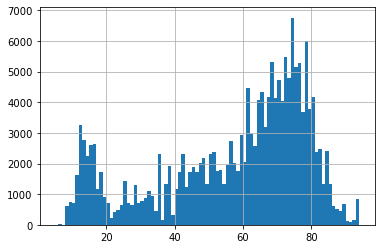

In [5]:
print(df.attacking_crossing.max()-df.attacking_crossing.min()+1)
nbins=89
print(df['attacking_crossing'].unique())
df['attacking_crossing'].hist(bins = nbins)

In [6]:
print(df.overall)

0         91
1         91
2         90
3         90
4         89
          ..
181356    64
181357    64
181358    64
181359    63
181360    61
Name: overall, Length: 181361, dtype: int64


**Realizamos el histograma de la variable "Overall" (Desempeño global)**

45


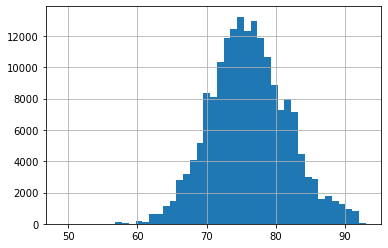

In [7]:
nbins=1*(df.overall.max()-df.overall.min())+1
df['overall'].hist(bins = nbins)
print(nbins)

La variable **'Overall'** se calcula usando otras variables de desempeño del jugador (skills_ratings), utilizando redondeo

La variable 'Overall' es numérica discreta, (pero de "naturaleza" continua) así como las otras de desempeño según habilidad ('Crossing',
       'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100, más allá del tipo de dato en estos casos.
       
Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'.

Mejores jugadores por posición:

In [14]:
best_players_per_position=df.iloc[df.groupby(df['club_position'])['overall'].idxmax()][['club_position','short_name','overall']]
best_players_per_position

,club_position,short_name,overall
2496,CAM,C. Hansen,90
5818,CB,M. Bright,87
2541,CDM,Patri Guijarro,85
2504,CF,Jenni Hermoso,88
2499,CM,V. Miedema,89
2501,GK,C. Endler,89
4224,LAM,K. McCabe,84
30,LB,S. Karchaoui,86
1,LCB,W. Renard,91
2505,LCM,A. Henry,88


Conteos por posiciones

In [17]:
pd.DataFrame(df.club_position.value_counts().sort_index())

,club_position
CAM,71
CB,75
CDM,41
CF,5
CM,43
GK,220
LAM,18
LB,144
LCB,220
LCM,166


Mejores Promedios de Overall por equipos

In [19]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

,club_name,overall
8,England W,90.000000
12,Germany W,84.500000
33,United States W,84.250000
29,Spain W,83.333333
31,Sweden W,81.600000
11,France W,81.000000
17,Lyon W,80.797619
0,Arsenal W,80.605263


## 2.-Preparación-de-los-datos-a analizar

**Reducimos el tamaño de la base. Retiramos jugadores con bajo Desempeño global ("overall"),**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [26]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>70)]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                  'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


**Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización**

In [27]:
MachineGunDict={'Name':'MachineGun','Overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99

df_n=df_n.append(MachineGunDict,ignore_index=True)

In [28]:
JugadorPromedioDict={'Name':'JugadorPromedio','Overall':df_n.Overall.mean()}
for skills in skills_ratings:
    JugadorPromedioDict[skills]=df_n[skills].mean()

df_n=df_n.append(JugadorPromedioDict,ignore_index=True)

In [29]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [30]:
df_skills.head(4)

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,70.0,93.0,91.0,78.0,92.0,90.0,76.0,68.0,64.0,92.0,89.0,85.0,90.0,91.0,82.0,91.0,91.0,87.0,86.0,89.0,70.0,24.0,95.0,79.0,75.0,92.0,44.0,39.0,30.0,7.0,12.0,8.0,16.0,13.0
1,51.0,70.0,96.0,84.0,55.0,69.0,65.0,58.0,87.0,85.0,65.0,62.0,53.0,90.0,34.0,85.0,86.0,75.0,93.0,65.0,88.0,90.0,70.0,59.0,75.0,84.0,93.0,94.0,91.0,7.0,14.0,17.0,11.0,15.0
2,71.0,95.0,86.0,91.0,87.0,87.0,68.0,70.0,82.0,93.0,88.0,89.0,83.0,84.0,67.0,90.0,81.0,87.0,81.0,83.0,53.0,46.0,92.0,75.0,88.0,92.0,41.0,43.0,39.0,11.0,11.0,10.0,10.0,11.0
3,71.0,94.0,93.0,84.0,90.0,91.0,79.0,75.0,72.0,91.0,81.0,85.0,74.0,92.0,47.0,86.0,89.0,75.0,81.0,89.0,65.0,23.0,96.0,76.0,86.0,86.0,42.0,33.0,30.0,15.0,7.0,12.0,10.0,14.0


In [31]:
df_skills.tail(4)

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
8044,65.000000,25.000000,76.000000,78.000000,22.000000,32.000000,33.000000,42.000000,48.000000,65.000000,55.000000,78.000000,64.000000,74.000000,70.000000,38.000000,75.000000,67.000000,74.000000,24.000000,73.000000,76.000000,22.000000,31.000000,38.000000,57.000000,72.000000,79.000000,78.000000,8.000000,13.000000,11.000000,11.00000,10.000000
8045,35.000000,25.000000,72.000000,65.000000,31.000000,63.000000,33.000000,30.000000,42.000000,61.000000,63.000000,73.000000,68.000000,76.000000,78.000000,58.000000,84.000000,62.000000,74.000000,31.000000,76.000000,75.000000,31.000000,38.000000,36.000000,68.000000,76.000000,78.000000,75.000000,10.000000,6.000000,9.000000,9.00000,13.000000
8046,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000
8047,59.621225,56.895365,59.742016,70.905555,49.982354,65.106002,56.216105,51.686716,63.414564,70.130483,68.632907,69.732447,66.196968,75.602336,69.965826,65.314154,67.387722,69.298372,66.568411,56.789735,58.858705,55.191748,60.131975,63.075805,56.462284,68.270287,54.150864,55.994408,52.603082,18.112837,18.053436,17.872002,17.98049,18.400398


## 3.-Exploratorio-Visual-para-Clustering

Visualizamos los datos (jugadores) según sus habilidades es decir, en un espacio 34 dimensional. Cómo hacemos? empecemos de a dos variables numéricas por vez

**Consigna de trabajo:** visualizar a los jugadores (datos) usando las variables numéricas en skill_ratings de a pares. Emergen grupos/clusters?

In [32]:
skills_ratings

['attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

Gráfica con seaborn

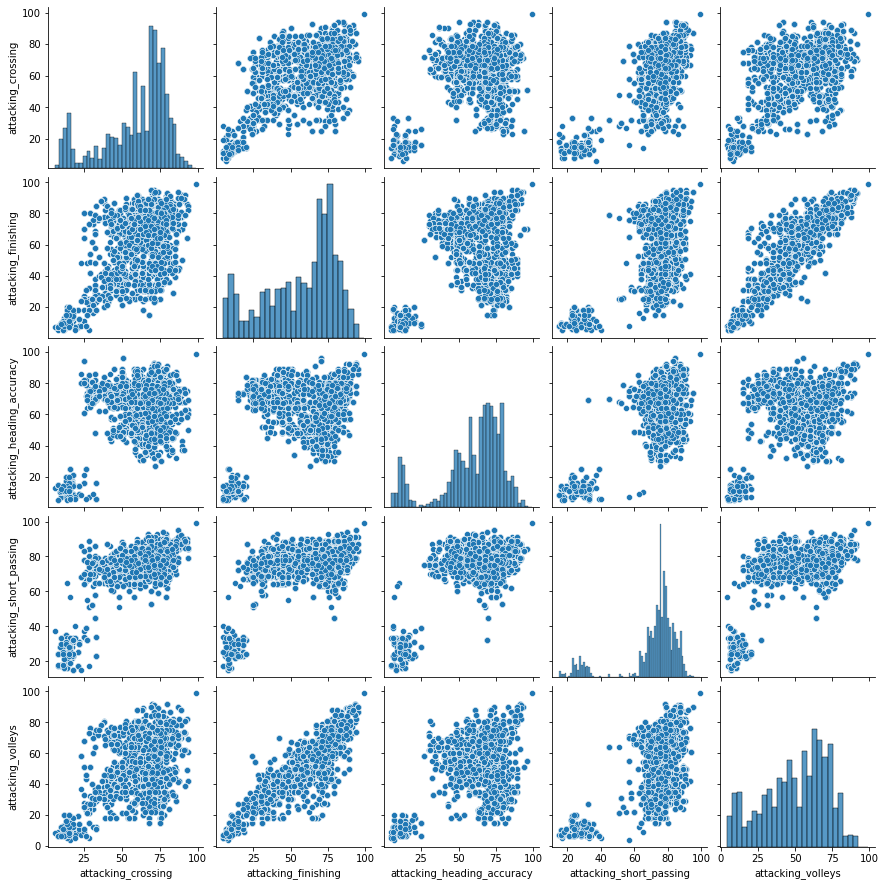

In [33]:
sns.pairplot(df_skills[skills_ratings[0:5]])

In [34]:
#data=[]
bool_crack=df_n["Overall"] > 85 #diferenciamos a los mejores jugadores

#Elegimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5] #5,  2 ..
skill_2=skills_ratings[15]  #15, 29, 4 ..

Gráfica con matplotlib.pyplot, liviana pero más sencilla

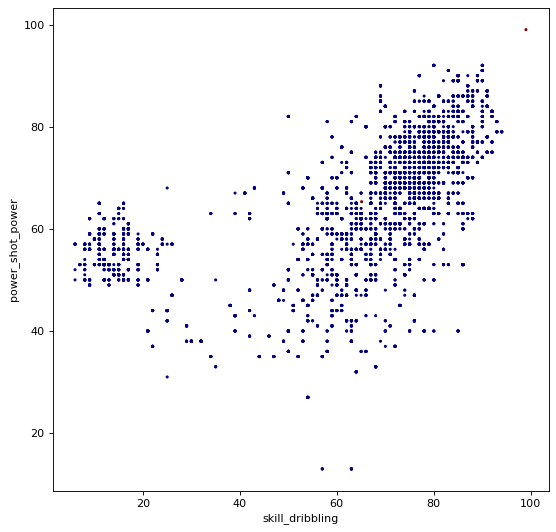

In [35]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

Gráfica con Plotly, más completa e interactiva pero un poco pesada

In [36]:
#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[15]

In [40]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)


In [41]:
#En Colab
fig.show(renderer="colab")

In [42]:
#En Jupyter Ntb abre en otra ventana,
plot(fig)

'temp-plot.html'

In [ ]:
#En Jupyter ntb
plot(fig) #abre y muestra en otra pestaña
#iplot(fig)  #muestra aquí